<a href="https://colab.research.google.com/github/OtiEdema/deploy/blob/main/Handwritten_Digit_Recognition_with_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Handwritten Digit Recognition with AI**

In [1]:
# Demonstrates how AI can recognise handwritten digits using a neural network.

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import cv2
from google.colab import drive

In [2]:
# Load the MNIST dataset
# The MNIST dataset contains 70,000 grayscale images of handwritten digits (0-9)
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Preprocessing the data
# Normalise the image data to scale pixel values between 0 and 1
X_train = X_train / 255.0  # Normalize training data.
X_test = X_test / 255.0  # Normalize test data.

In [4]:
# Reshape the training and test data to fit the model input
# Model expects input shape (None, 28, 28, 1) for grayscale images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)  # Reshape training data to have a single color channel.
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)  # Reshape test data to have a single color channel.

In [5]:
# Convert labels to categorical format for training
y_train = to_categorical(y_train, 10)  # Convert training labels to one-hot encoded format.
y_test = to_categorical(y_test, 10)  # Convert test labels to one-hot encoded format.

In [6]:
# Build a simple CNN model for MNIST digit classification
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer with 32 filters and ReLU activation.
    MaxPooling2D((2, 2)),  # Max pooling layer to reduce spatial dimensions.
    Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer with 64 filters and ReLU activation.
    MaxPooling2D((2, 2)),  # Another max pooling layer.
    Flatten(),  # Flatten the 3D output to 1D for the dense layers.
    Dense(64, activation='relu'),  # Fully connected layer with 64 neurons and ReLU activation.
    Dense(10, activation='softmax')  # Output layer with 10 neurons for each digit (0-9) and softmax activation.
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer and categorical crossentropy loss.



In [8]:
# Train the model on the MNIST training set
model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))  # Train the model for 3 epochs with validation on the test set.


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9073 - loss: 0.3137 - val_accuracy: 0.9860 - val_loss: 0.0423
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9859 - loss: 0.0479 - val_accuracy: 0.9882 - val_loss: 0.0349
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9892 - loss: 0.0330 - val_accuracy: 0.9898 - val_loss: 0.0315


In [9]:

# Function to predict a custom handwritten digit image
def predict_custom_image(image_path):
    # Load the image from the specified path
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale mode.
    # Resize the image to 28x28 pixels
    image = cv2.resize(image, (28, 28))  # Resize the image to match the input size expected by the model.
    # Normalize the pixel values to scale between 0 and 1
    image = image / 255.0  # Normalize pixel values.
    # Reshape the image to fit the model input
    image = image.reshape(1, 28, 28, 1)  # Reshape the image to add batch dimension and color channel.
    # Make a prediction
    predicted_label = np.argmax(model.predict(image))  # Predict the label and get the index of the highest probability.
    # Visualize the image and prediction
    plt.imshow(image.reshape(28, 28), cmap='gray')  # Display the image.
    plt.title(f"Predicted: {predicted_label}")  # Display the predicted label.
    plt.axis('off')  # Hide the axis.
    plt.show()
    # Output the result
    print(f"Model Prediction: {predicted_label}")  # Print the predicted label.


# Example usage

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


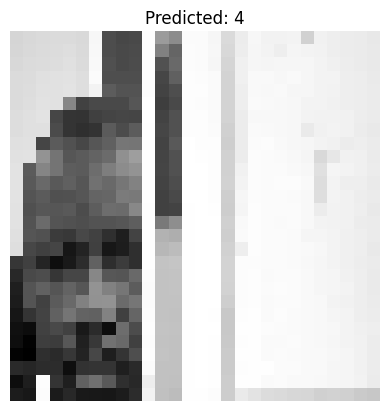

Model Prediction: 4


In [10]:
# Provide the path to a handwritten digit image stored in your Google Drive
# Replace 'your_image_path.jpg' with the actual path to your image
custom_image_path = '/content/drive/MyDrive/files/42.jpg'  # Path to the custom image in Google Drive.
predict_custom_image(custom_image_path)  # Predict the custom image.


In [11]:
# Select a random image from the test set
index = np.random.randint(0, len(X_test))  # Select a random index from the test set.
test_image = X_test[index]  # Get the test image at the selected index.
true_label = np.argmax(y_test[index])  # Get the true label of the test image.

In [12]:
# Make a prediction
predicted_label = np.argmax(model.predict(test_image.reshape(1, 28, 28, 1)))  # Predict the label of the test image.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


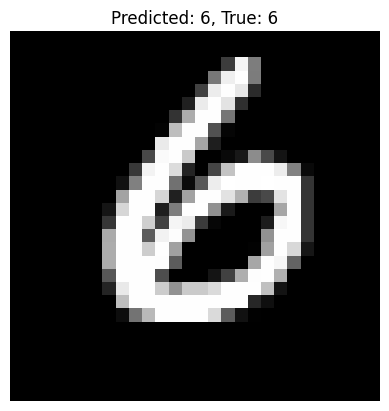

In [13]:
# Visualize the test image and prediction
plt.imshow(test_image.reshape(28, 28), cmap='gray')  # Display the test image.
plt.title(f"Predicted: {predicted_label}, True: {true_label}")  # Display the predicted and true labels.
plt.axis('off')  # Hide the axis.
plt.show()

In [14]:
# Output the result
print(f"Model Prediction: {predicted_label}")  # Print the predicted label.
print(f"Actual Label: {true_label}")  # Print the true label.


Model Prediction: 6
Actual Label: 6
